In [60]:
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns

In [277]:
raxml_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/raxml_real_data.csv")
iqtree_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/iqtree_real_data.csv")
summary = pd.read_csv("/Users/noa/Workspace/bootstrap_repo/real_data_evaluation/summary.csv")

raxml_real_data_doro = 
iqtree_real_data_doro = 



In [278]:
pd.options.display.max_colwidth = 50
raxml_real_data["study_name"] = raxml_real_data['msa_path'].str.split('/').str[-2]
iqtree_real_data["study_name"] = iqtree_real_data['msa_path'].str.split('/').str[-2]

In [279]:
raxml_real_data = raxml_real_data.merge(summary, left_on = "study_name", right_on = "name")
iqtree_real_data = iqtree_real_data.merge(summary, left_on = "study_name", right_on = "name")

In [286]:
summary.columns

Index(['Unnamed: 0', 'name', 'Total_matrix_cells', 'Undetermined_characters',
       'Missing_percent', 'No_variable_sites', 'Proportion_variable_sites',
       'Parsimony_informative_sites', 'Proportion_parsimony_informative',
       'AT_content', 'GC_content', 'dataset.DOI', 'dataset.alignment.datatype',
       'dataset.alignment.nchar', 'dataset.alignment.ntax',
       'dataset.alignment.partitions', 'dataset.genomes.bacterial',
       'dataset.genomes.chloroplast', 'dataset.genomes.dsDNA',
       'dataset.genomes.dsRNA', 'dataset.genomes.mitochondrial',
       'dataset.genomes.nuclear', 'dataset.genomes.ssDNA',
       'dataset.genomes.ssRNA', 'dataset.license', 'dataset.notes',
       'dataset.study clade.english', 'dataset.study clade.latin',
       'dataset.study clade.taxon ID', 'dataset.study root age',
       'dataset.timetree root age', 'dataset.used for tree inference',
       'study.DOI', 'study.reference', 'study.year'],
      dtype='object')

In [313]:
 pd.melt(iqtree_real_data[['aLRT_iqtree','aBayes_iqtree','predicted_bootstrap_score_nni','study_name']], id_vars=['predicted_bootstrap_score_nni', 'study_name'], 
                     value_vars=['aBayes_iqtree', 'aLRT_iqtree'], 
                     var_name='type', value_name='value')

,predicted_bootstrap_score_nni,study_name,type,value
0,0.998926,Wainwright_2012,aBayes_iqtree,1.000
1,0.999638,Wainwright_2012,aBayes_iqtree,1.000
2,0.999649,Wainwright_2012,aBayes_iqtree,1.000
3,0.999628,Wainwright_2012,aBayes_iqtree,1.000
4,0.998964,Wainwright_2012,aBayes_iqtree,1.000
...,...,...,...,...
7817,0.989542,Rightmyer_2013,aLRT_iqtree,0.999
7818,0.911784,Rightmyer_2013,aLRT_iqtree,0.987
7819,0.999104,Rightmyer_2013,aLRT_iqtree,1.000
7820,0.999935,Rightmyer_2013,aLRT_iqtree,1.000


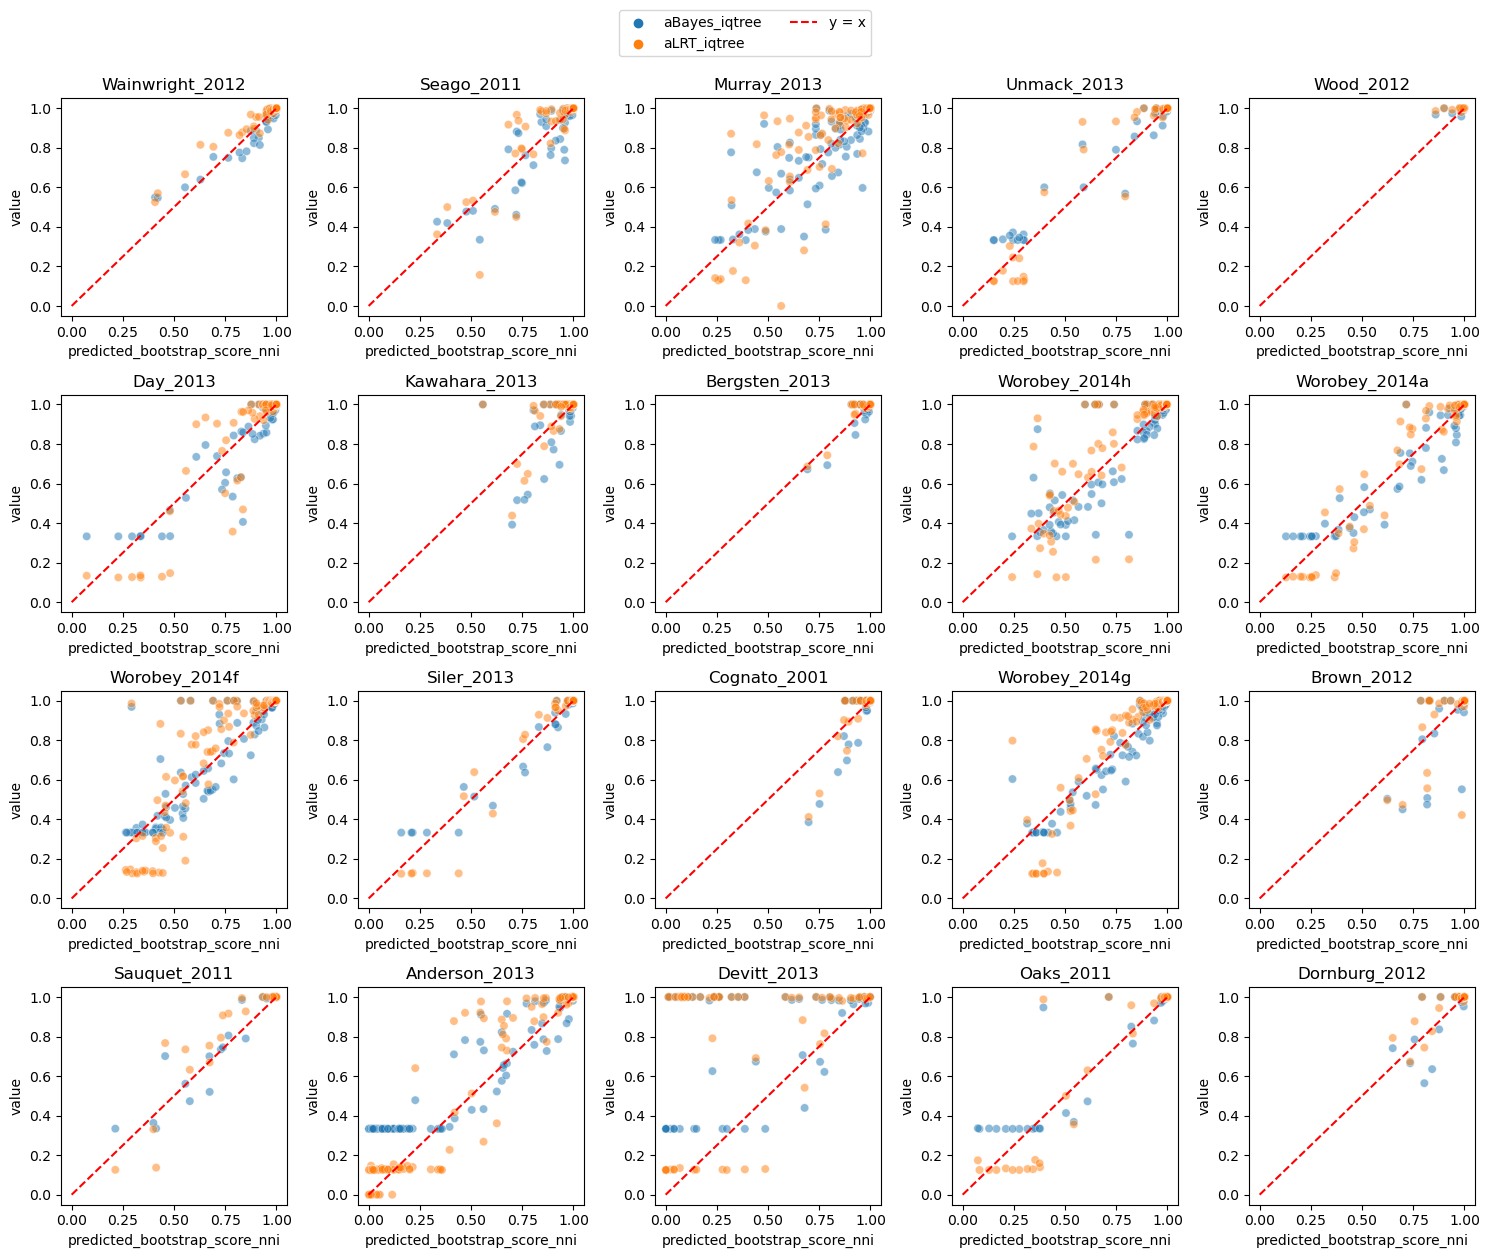

In [331]:
import matplotlib.pyplot as plt
import seaborn as sns

first_studies = iqtree_real_data['study_name'].unique()[:20]
fig, axes = plt.subplots(4, 5, figsize=(15, 12))

data_iqtree =  pd.melt(iqtree_real_data[['aLRT_iqtree','aBayes_iqtree','predicted_bootstrap_score_nni','study_name']], id_vars=['predicted_bootstrap_score_nni', 'study_name'], 
                     value_vars=['aBayes_iqtree', 'aLRT_iqtree'], 
                     var_name='type', value_name='value')



for idx, study in enumerate(first_studies):
    iqtree_real_data_small = data_iqtree.loc[data_iqtree.study_name == study]
    i = idx // 5
    j = idx % 5    
    ax = axes[i, j]
    sns.scatterplot(x='predicted_bootstrap_score_nni', y='value', data=iqtree_real_data_small, hue="type", ax=ax, alpha = 0.5)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')
    ax.set_title(study)
    ax.set_xlim(-0.05, 1.05)  # Set the x-axis limit to start at 0
    ax.set_ylim(-0.05, 1.05)  # Set the y-axis limit to start at 0
    ax.legend().remove()  # Remove the legend
    plt.tight_layout()
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.tight_layout()
plt.show()

In [145]:
print(np.mean(iqtree_real_data['aLRT_iqtree']))
print(np.mean(iqtree_real_data['aBayes_iqtree']))
print(np.mean(iqtree_real_data['ultrafast_support']))
print(np.mean(iqtree_real_data['predicted_bootstrap_score_nni']))
print(np.mean(iqtree_real_data['predicted_bootstrap_score_no_nni']))

0.8948243416006137
0.8929621580158528
0.9129506520071593
0.8695342390946891
0.8883264793314367


In [289]:
summary[['name','Missing_percent','dataset.alignment.nchar','dataset.alignment.ntax']].loc[summary.name.isin(['Murray_2013','Seago_2011'])]

,name,Missing_percent,dataset.alignment.nchar,dataset.alignment.ntax
4,Seago_2011,23.902,2253,97
9,Murray_2013,38.185,3111,237


In [303]:
summary[['name','Missing_percent','dataset.alignment.nchar','dataset.alignment.ntax']].loc[summary.name.isin(['Worobey_2014h','Worobey_2014a','Worobey_2014f','Bergsten_2013','Dornburg_2012'])]

,name,Missing_percent,dataset.alignment.nchar,dataset.alignment.ntax
15,Bergsten_2013,1.938,2111,38
23,Worobey_2014h,0.003,2280,351
24,Worobey_2014a,1.871,1716,146
25,Worobey_2014f,0.008,2151,332
54,Dornburg_2012,21.845,5919,44


array([[1.        , 0.33524623],
       [0.33524623, 1.        ]])

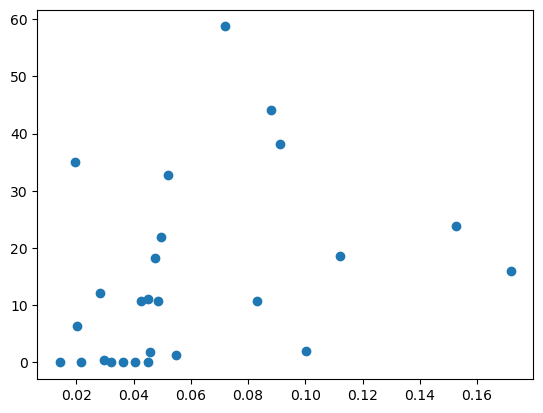

In [325]:
raxml_real_data['diff_2'] = (raxml_real_data['predicted_bootstrap_score_nni']-raxml_real_data['Standard bootstrap'])**2 
grouped_data = raxml_real_data.groupby(['study_name','Missing_percent','dataset.alignment.nchar','dataset.alignment.ntax']).agg(mean_sbs=('Standard bootstrap', 'mean'), mean_ML=('predicted_bootstrap_score_nni', 'mean'), mean_diff = ('diff_2','mean')).reset_index()
grouped_data['diff'] = grouped_data['mean_ML']-grouped_data['mean_sbs']

grouped_data.sort_values('mean_diff')


plt.scatter(grouped_data['mean_diff'], grouped_data['Missing_percent'])
np.corrcoef(grouped_data['mean_diff'], grouped_data['Missing_percent'])

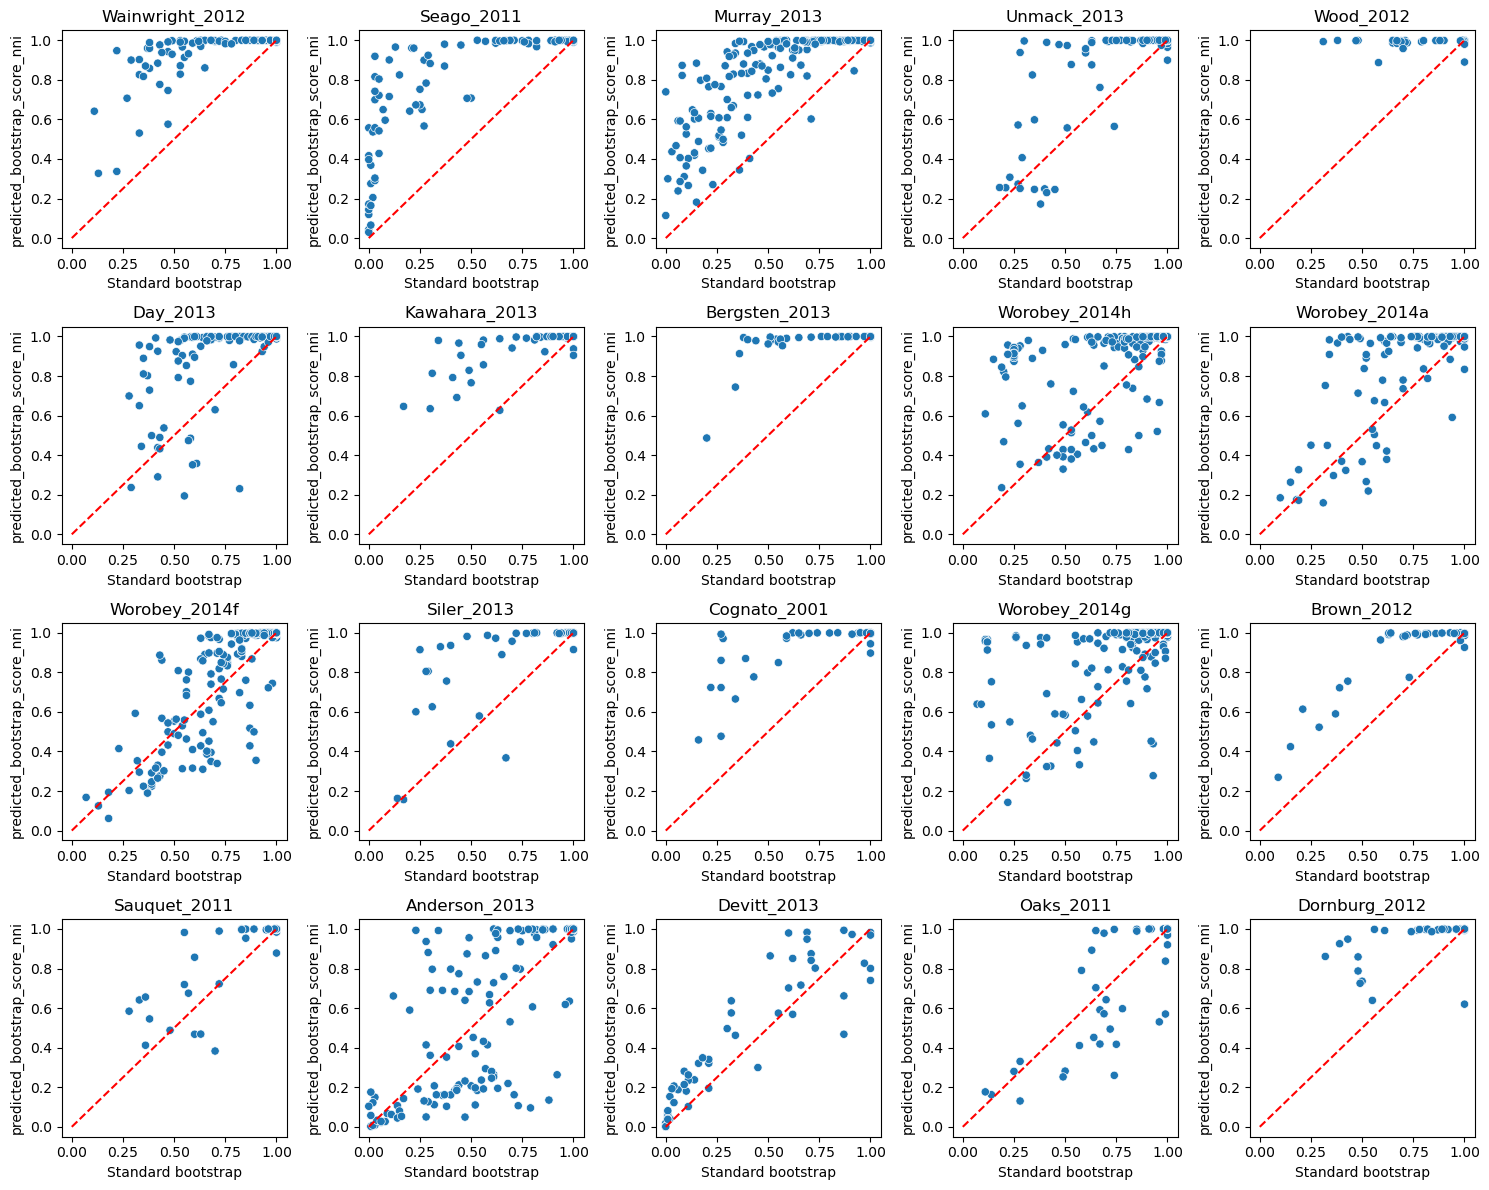

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

first_studies = raxml_real_data['study_name'].unique()[:20]
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
raxml_real_data['Standard bootstrap'] = raxml_real_data.bootstrap_support / 100

for idx, study in enumerate(first_studies):
    raxml_real_data_small = raxml_real_data.loc[raxml_real_data.study_name == study]
    i = idx // 5
    j = idx % 5    
    ax = axes[i, j]
    sns.scatterplot(y='predicted_bootstrap_score_nni', x='Standard bootstrap', data=raxml_real_data_small, hue="study_name", ax=ax)
    ax.plot([0, 1], [0, 1], color='red', linestyle='--', label='y = x')
    ax.set_title(study)
    ax.set_xlim(-0.05, 1.05)  # Set the x-axis limit to start at 0
    ax.set_ylim(-0.05, 1.05)  # Set the y-axis limit to start at 0
    ax.legend().remove()  # Remove the legend
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

In [191]:
print(np.mean(raxml_real_data['bootstrap_support']))
print(np.mean(raxml_real_data['tbe_raxml']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_nni']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_no_nni']))

74.90590641779596
0.8860602173357198
0.8557875939109184
0.862989449365441


In [179]:
np.unique(raxml_real_data['feature_msa_n_seq'])

array([ 32.,  38.,  41.,  44.,  51.,  61.,  69.,  70.,  79.,  92.,  94.,
        97., 139., 145., 146., 152., 188., 237., 326., 327., 332., 340.,
       351., 355.])